# Making inference using the pretrained pruned and quantized model using modoptima.

### Downloading the pretrained model and other resources.

In [1]:
!python3 -m gdown.cli "https://drive.google.com/uc?id=1kzV0lN8R4BT0IzCmv6uLAkxSFFaqyYzr&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1kzV0lN8R4BT0IzCmv6uLAkxSFFaqyYzr&confirm=t
To: /content/tiny_yolo_notebook_resources.zip
100% 47.4M/47.4M [00:00<00:00, 49.6MB/s]


In [4]:
!unzip /content/tiny_yolo_notebook_resources.zip

Archive:  /content/tiny_yolo_notebook_resources.zip
   creating: tiny_yolo_notebook_resources/
  inflating: tiny_yolo_notebook_resources/best.onnx  
  inflating: tiny_yolo_notebook_resources/best.pt  
  inflating: tiny_yolo_notebook_resources/stop_sign2.jpg  
  inflating: tiny_yolo_notebook_resources/stop_sign3.jpg  


###Installing dependencies for modoptima

In [2]:
!pip install deepsparse[yolo]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    

### Build and install modoptima from the source

In [5]:
#Clone the repo.
!git clone https://github.com/VikasOjha666/modoptima.git
#Changing directory to the cloned.
%cd modoptima
#Build and install.
!python setup.py install
%cd ../
#Remove the cloned folder.
!rm -rf modoptima

Cloning into 'modoptima'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 212 (delta 74), reused 208 (delta 70), pack-reused 0
Receiving objects: 100% (212/212), 33.57 MiB | 25.45 MiB/s, done.
Resolving deltas: 100% (74/74), done.
/content/modoptima
running install
running bdist_egg
running egg_info
creating modoptima.egg-info
writing modoptima.egg-info/PKG-INFO
writing dependency_links to modoptima.egg-info/dependency_links.txt
writing requirements to modoptima.egg-info/requires.txt
writing top-level names to modoptima.egg-info/top_level.txt
writing manifest file 'modoptima.egg-info/SOURCES.txt'
package init file 'modoptima/__init__.py' not found (or not a regular file)
writing manifest file 'modoptima.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/modoptima
co

### Import the necessary libraries.

In [1]:
import cv2
import numpy as np
from modoptima.MasterInferencer import IYOLOv7
import matplotlib.pyplot as plt
%matplotlib inline

### Load the predictor class.

In [2]:
inferencer=IYOLOv7("./tiny_yolo_notebook_resources/best.onnx")

### Run prediction on image.
##### Both image and paths are accepted as input to predict function. In case you are passing image the image needs to be resized to 640x640 as this model has been exported for this size. Passing image of any other size might through error. However paths of images of different sizes could be passed because the predictor resizes it internally. You can create model which accept any size while exporting it after the training using modoptima YOLO trainer class.

In [3]:
boxes,scores,labels=inferencer.predict('./tiny_yolo_notebook_resources/stop_sign3.jpg')

/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


### Fetching the boxes for visulization.
The boxes is a list of boxes we need to take out the bounding box for visualization. The output in this example something like this [[[339.77752685546875,106.0186538696289,501.29144287109375,
318.7185363769531]]] so we get the bouding box by boxes=boxes[0][0] where first axis represent the bounding box number in the list.

In [4]:
boxes=boxes[0][0]

### Visualizing the bounding box.
Here we load the image and visualize the boxes on it. Remember that the predictor will automatically resize it to 640x640 in case of this pretrained model as it was exported for this size. Hence the prediction will be for image of this size and hence it needs to be rescaled with height and width ratios. Hence we load the image,rescale the boxes and visualize it.

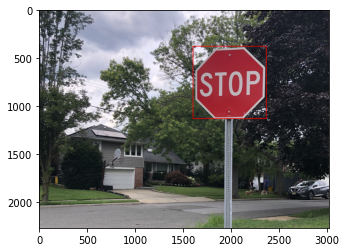

In [5]:
(newW,newH)=(640,640)
#Open image.
img=cv2.cvtColor(cv2.imread('./tiny_yolo_notebook_resources/stop_sign3.jpg'),cv2.COLOR_BGR2RGB)
#Calculate ratios
(old_height,old_width)=img.shape[:2]
rW = old_width / float(newW)
rH = old_height / float(newH)

#Rescale and visualize.
img=cv2.rectangle(img,(round(boxes[0]*rW),round(boxes[1]*rH)),(round(boxes[2]*rW),round(boxes[3]*rH)),color=(255,0,0),thickness=5)
plt.imshow(img)